# Fraud Detection Analysis | Exploratory Data Analysis with Visualization

Fraud detection is a critical aspect of financial security, aimed at identifying and preventing fraudulent activities. This analysis involves exploring and visualizing data to uncover patterns and anomalies that may indicate fraudulent behavior. By leveraging various data visualization techniques, we can gain insights into the data distribution, relationships, and trends, which are essential for building effective fraud detection models.

#### Loading Data

In [3]:
import pandas as pd
import seaborn as sns

file_name = 'DATA/creditcard.csv'
data = pd.read_csv(file_name)

y = data['Class']
X = data.drop(columns=['Class'])

#### Feature Distribution
Analyze the feature distribution for the assumption we might make in the next steps

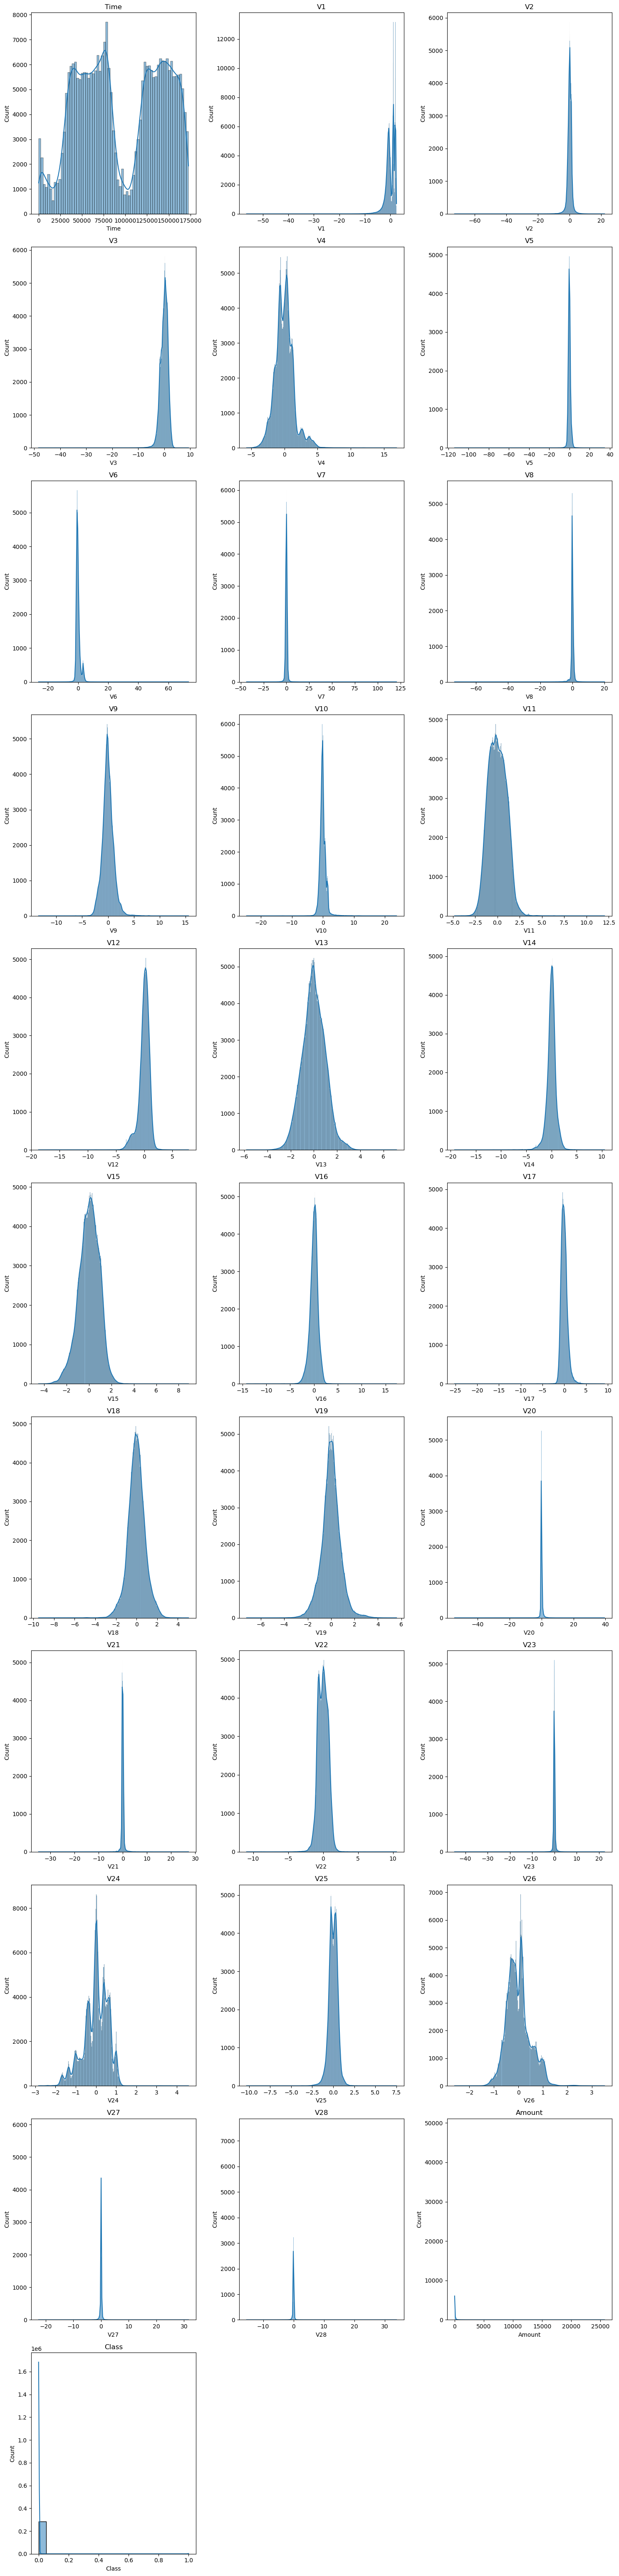

In [4]:
import matplotlib.pyplot as plt

# Number of features
num_features = data.shape[1]

# Create subplots
fig, axes = plt.subplots(nrows=num_features//3 + 1, ncols=3, figsize=(15, num_features*2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Most of the feature look normally distributed, some of the bimodal normally distributed, so standardization (Z-score normalization) can be applied

### BoxPlot for Anomalies Identification
Plot the features through boxplot to spot abnormal values

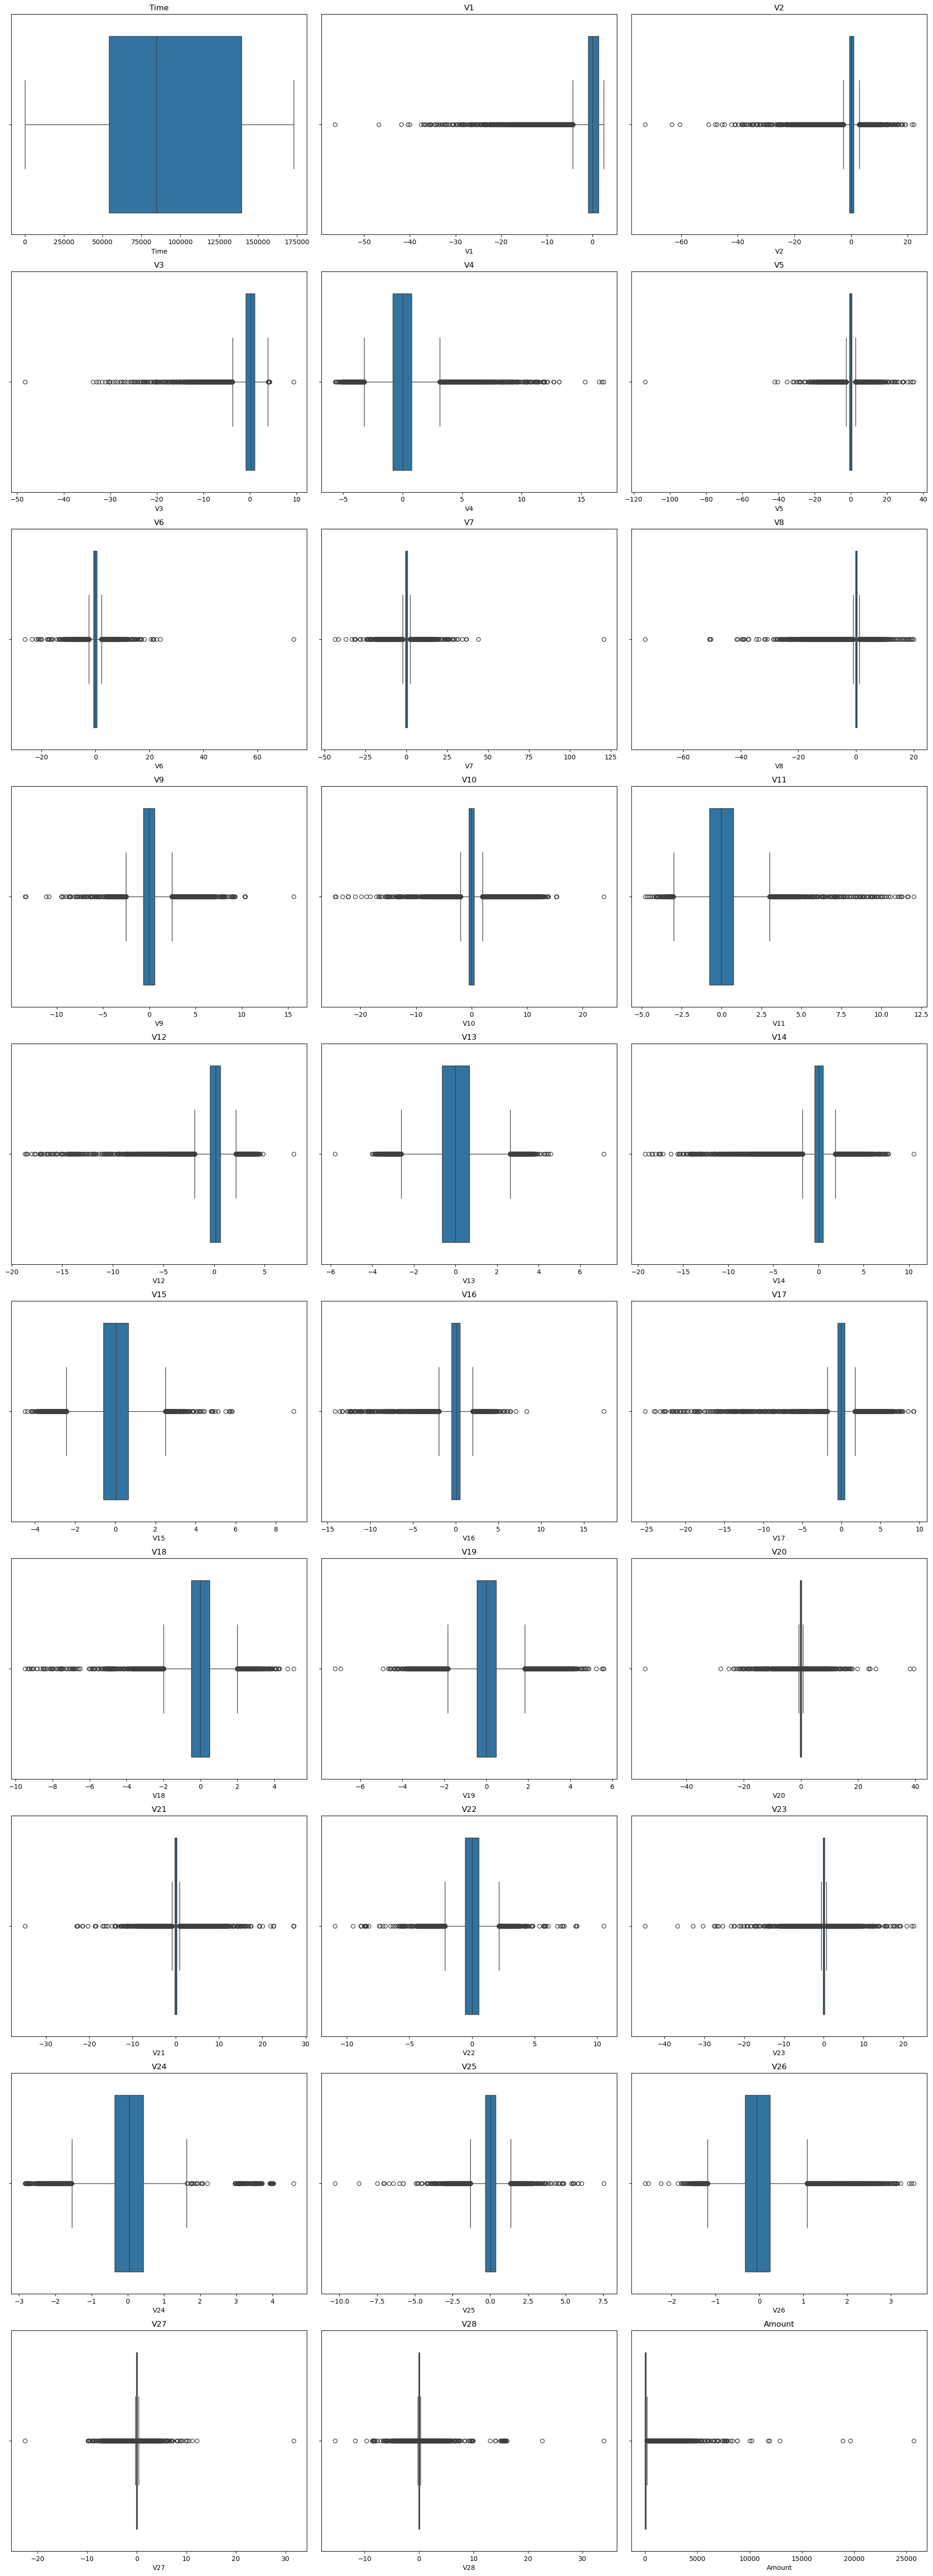

In [5]:
# Number of features
num_features = X.shape[1]

# Create subplots
fig, axes = plt.subplots(nrows=num_features//3 + 1, ncols=3, figsize=(20, num_features*2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each feature
for i, col in enumerate(X.columns):
    sns.boxplot(x=X[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# there are outliers but kept them because they might be related to fraud

### Correlation matrix
Checking correlation between features is important for several reasons:
1. Avoid Multicollinearity – Highly correlated features can make models like linear/logistic regression unstable, leading to unreliable coefficients.
2. Reduce Redundancy – Removing correlated features simplifies the model without losing much information.
3. Improve Performance – Too many correlated features can cause overfitting and slow down training.
4. Enhance Interpretability – Models are easier to understand when features are independent.
5. Optimize Feature Selection – Helps in choosing the most relevant features for better predictions.


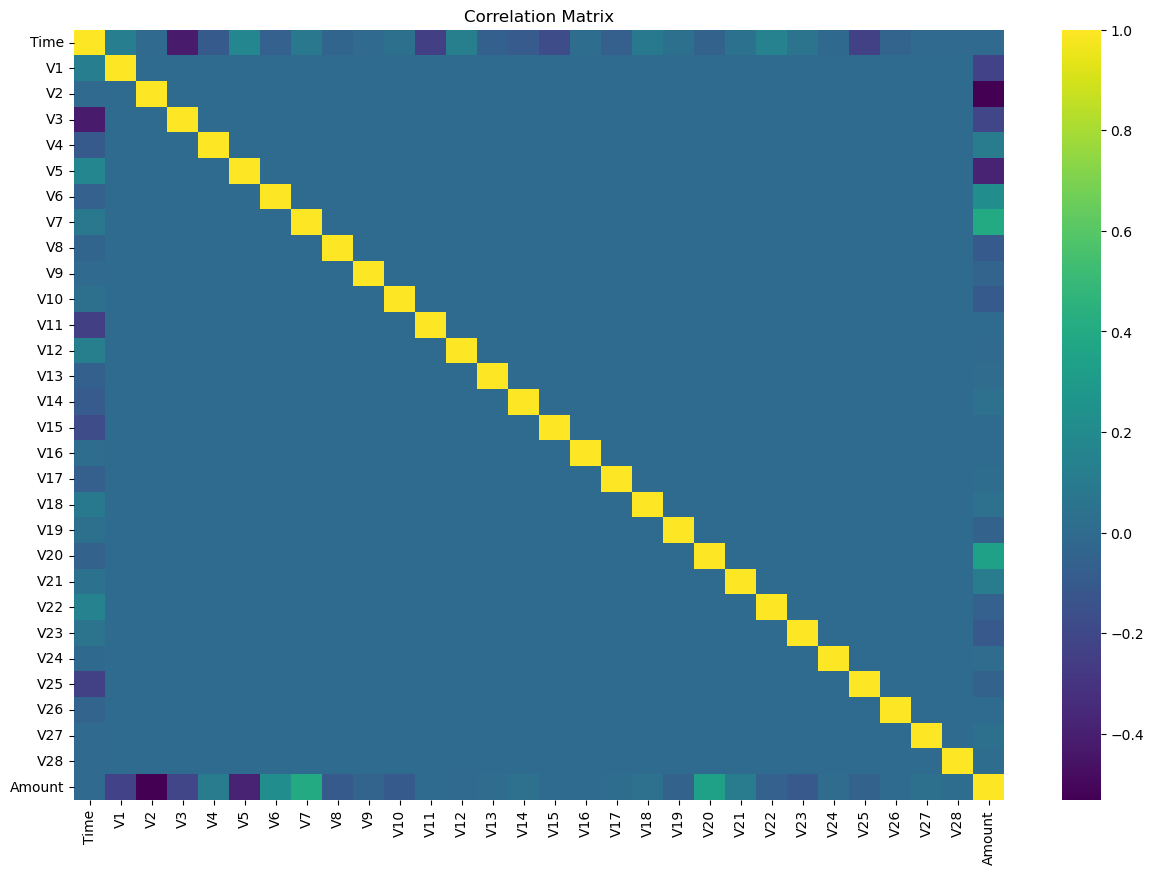

In [7]:
correlation_matrix = X.corr()
# print(correlation_matrix)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# there doesnt seem to be any important correlation, so kept every feature